# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 3</center>
### <center>Ensambles</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

# Imports y preparacion del dataset

En primer lugar instalamos la libreria de xgboost para luego importarla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
import xgboost as xgb
import random
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv("../dataset/hotels_train_procesado.csv")
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'hotel_encoding',
       'tiene_hijos', 'es_extranjero', 'es_portugues', 'es_ingles',
       'es_frances', 'es_espanol', 'es_aleman', 'reserved_room_was_assigned',
       'required_a_car_parking_space', 'solo_desayuna_en_el_hotel',
       'pidio_todas_comidas', 'reservo_online', 'reservo_en_grupo',
       'reservo_sin_reembols

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [3]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    "lead_time",
    #"reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    #"stays_in_week_nights",

    "tiene_hijos",
    "adults",
    #"children",
    #"babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    "es_extranjero",
    "es_portugues",
    "es_ingles",
    "es_frances",
    "es_espanol",
    "es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", 
    "previous_bookings_not_canceled",
    "total_reservas_previas",
    "total_of_special_requests",
    "booking_changes",

    # 'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    'required_car_parking_spaces',
    #"required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_agente",
    "reservo_sin_paquete",
    
    "days_in_waiting_list",
    #"tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    #"agent1",
    "agent14",
    "agent6",
]

**Dividimos el dataset en entrenamiento y validacion**, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que el modelo predice bien a registros no vistos anteriormente. 

In [4]:
X = df[attrs]
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

Vamos a empezar definiendo algunos clasificadores de xgb con los parametros por default, pero con muchos estimadores. XGBoost nos hace muy facil esto, ya que podemos proporcionarle el dataset de validacion y un parametro `early_stopping_rounds`, que frena el entrenamiento cuando la funcion de coste (en este caso log loss) deja de disminuir en validacion. 

In [5]:
clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000, early_stopping_rounds=50)

clf.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_val, y_val)],
       verbose=50)

[0]	validation_0-logloss:0.64889	validation_1-logloss:0.64890
[50]	validation_0-logloss:0.31958	validation_1-logloss:0.32507
[100]	validation_0-logloss:0.28770	validation_1-logloss:0.30202
[150]	validation_0-logloss:0.26957	validation_1-logloss:0.29347
[200]	validation_0-logloss:0.25503	validation_1-logloss:0.28746
[250]	validation_0-logloss:0.24250	validation_1-logloss:0.28416
[300]	validation_0-logloss:0.23243	validation_1-logloss:0.28166
[350]	validation_0-logloss:0.22195	validation_1-logloss:0.27908
[400]	validation_0-logloss:0.21625	validation_1-logloss:0.27842
[450]	validation_0-logloss:0.20764	validation_1-logloss:0.27737
[500]	validation_0-logloss:0.20328	validation_1-logloss:0.27718
[550]	validation_0-logloss:0.19549	validation_1-logloss:0.27723
[571]	validation_0-logloss:0.19285	validation_1-logloss:0.27714


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Calculamos su score, y las features mas importantes que utiliza, las cuales son muy parecidas a las utilizadas por los decision trees.

f1 score sobre validacion:  0.8769724182168055
f1 score sobre train:  0.9203460429349568


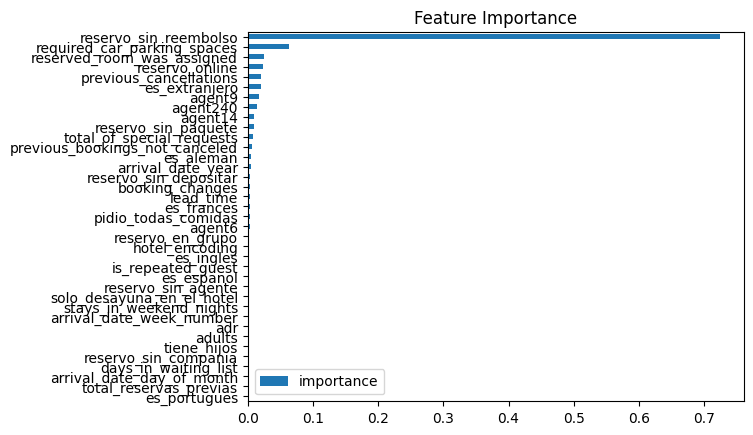

In [6]:
print("f1 score sobre validacion: ", f1_score(y_val, clf.predict(X_val)))
print("f1 score sobre train: ", f1_score(y_train, clf.predict(X_train)))

fi = pd.DataFrame(data=clf.feature_importances_,
             index=clf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Ahora cambiamos algunos parametros:
* `max_depth`: el largo maximo que pueden tener todos los arboles que entrena.
* `subsample`: el porcentaje del dataset elegido al azar que sera utilizado para entrenar a cada arbol.
* `colsample_bytree`: Lo mismo que subsample, pero para las columnas. Es decir que elige al azar las variables que usa el arbol.

Estos ultimos dos parametros nos ayudan a que los arboles sean mas independientes entre si y que no se 'fijen' siempre en la misma parte del dataset. Nos ayudan a disminuir el overfitting.

In [7]:
clf2 = xgb.XGBClassifier(learning_rate=0.1,
                         max_depth=10,
                         subsample=0.8,
                         colsample_bytree=0.6,
                         n_estimators=1000, early_stopping_rounds=50)

clf2.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_val, y_val)],
       verbose=50)

print("f1 score sobre validacion: ", f1_score(y_val, clf2.predict(X_val)))
print("f1 score sobre train: ", f1_score(y_train, clf2.predict(X_train)))

[0]	validation_0-logloss:0.64552	validation_1-logloss:0.64611
[50]	validation_0-logloss:0.25450	validation_1-logloss:0.29095
[100]	validation_0-logloss:0.21406	validation_1-logloss:0.27619
[150]	validation_0-logloss:0.18094	validation_1-logloss:0.27099
[200]	validation_0-logloss:0.15634	validation_1-logloss:0.26897
[250]	validation_0-logloss:0.13685	validation_1-logloss:0.26851
[293]	validation_0-logloss:0.12225	validation_1-logloss:0.26956
f1 score sobre validacion:  0.8817342226782966
f1 score sobre train:  0.959360027378508


In [8]:
clf3 = xgb.XGBClassifier(learning_rate=0.1,
                         max_depth=13,
                         subsample=0.85,
                         colsample_bytree=0.7,
                         # regularizacion:
                         gamma=5,
                         reg_lambda=2,
                         reg_alpha=2,
                         n_estimators=500, early_stopping_rounds=50)

clf3.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_val, y_val)],
       verbose=50)

print("f1 score sobre validacion: ", f1_score(y_val, clf3.predict(X_val)))
print("f1 score sobre train: ", f1_score(y_train, clf3.predict(X_train)))

[0]	validation_0-logloss:0.64482	validation_1-logloss:0.64518
[50]	validation_0-logloss:0.27289	validation_1-logloss:0.29289
[100]	validation_0-logloss:0.25490	validation_1-logloss:0.28333
[150]	validation_0-logloss:0.24718	validation_1-logloss:0.28097
[200]	validation_0-logloss:0.24247	validation_1-logloss:0.27985
[250]	validation_0-logloss:0.23855	validation_1-logloss:0.27883
[300]	validation_0-logloss:0.23562	validation_1-logloss:0.27815
[350]	validation_0-logloss:0.23258	validation_1-logloss:0.27746
[400]	validation_0-logloss:0.23116	validation_1-logloss:0.27718
[450]	validation_0-logloss:0.22942	validation_1-logloss:0.27685
[499]	validation_0-logloss:0.22770	validation_1-logloss:0.27668
f1 score sobre validacion:  0.8762674881273265
f1 score sobre train:  0.9054404422636011


Ahora que tenemos una idea de como se comporta el modelo 

In [9]:
param_grid = {
 'max_depth': list(range(10,16)),
 'subsample': [0.6,0.7,0.8,0.9,1],
 'colsample_bytree': [0.6,0.7,0.8,0.9,1],
}

xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=400)

grid = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, cv=3, n_iter=10, scoring=make_scorer(f1_score))
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=400, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'max_depth': [10, 11, 12, 13, 14, 15],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   scoring=make_scorer(f1_score))

In [10]:
grid.best_params_

{'subsample': 0.9, 'max_depth': 10, 'colsample_bytree': 0.8}

In [11]:
f1_score(y_val, grid.predict(X_val))

0.8812709030100334

In [12]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_max_depth,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,31.110690,12.574561,0.164528,0.035676,0.9,14,1,"{'subsample': 0.9, 'max_depth': 14, 'colsample...",0.875591,0.871762,0.872990,0.873448,0.001596,6
1,13.707355,0.856079,0.119056,0.014219,0.9,10,0.8,"{'subsample': 0.9, 'max_depth': 10, 'colsample...",0.877970,0.873547,0.876740,0.876086,0.001864,1
2,21.016765,3.110556,0.172736,0.031672,0.7,14,1,"{'subsample': 0.7, 'max_depth': 14, 'colsample...",0.872680,0.870792,0.872364,0.871945,0.000825,10
3,25.515608,4.944249,0.179063,0.030300,0.9,14,0.7,"{'subsample': 0.9, 'max_depth': 14, 'colsample...",0.878014,0.872146,0.874374,0.874845,0.002418,2
4,22.766502,0.172110,0.147220,0.009292,0.6,11,1,"{'subsample': 0.6, 'max_depth': 11, 'colsample...",0.876045,0.869830,0.873014,0.872963,0.002538,8
5,16.436802,1.731628,0.131651,0.006841,0.9,13,0.7,"{'subsample': 0.9, 'max_depth': 13, 'colsample...",0.877400,0.872471,0.874005,0.874625,0.002060,3
6,13.392612,1.560332,0.114047,0.004402,0.9,11,0.8,"{'subsample': 0.9, 'max_depth': 11, 'colsample...",0.877699,0.873221,0.872839,0.874586,0.002206,4
7,15.249913,0.274470,0.131586,0.001914,0.6,15,0.7,"{'subsample': 0.6, 'max_depth': 15, 'colsample...",0.873660,0.869256,0.873588,0.872168,0.002060,9
8,9.973340,0.037838,0.105111,0.000165,0.7,11,0.6,"{'subsample': 0.7, 'max_depth': 11, 'colsample...",0.877685,0.870010,0.872844,0.873513,0.003169,5
9,13.257938,0.033281,0.120045,0.005272,0.7,12,0.8,"{'subsample': 0.7, 'max_depth': 12, 'colsample...",0.876466,0.870190,0.873301,0.873319,0.002562,7


In [13]:
y_pred = grid.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

F1 Score: 0.8812709030100334
Precision: 0.877321039825842
Recall: 0.8852564930869622
Accuracy: 0.8807416499773887


Ploteamos las matrices de confusion, ambas para el conjunto de entrenamiento como el de validacion:

Text(0.5, 1.0, 'Confusion matrix de training set')

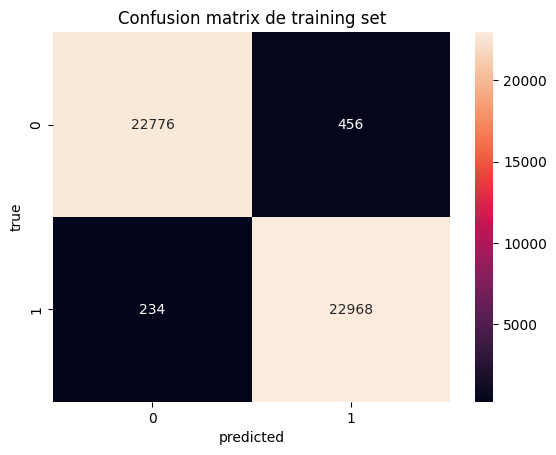

In [14]:
y_pred = grid.predict(X_train)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set")

precision 0.877321039825842
recall 0.8852564930869622


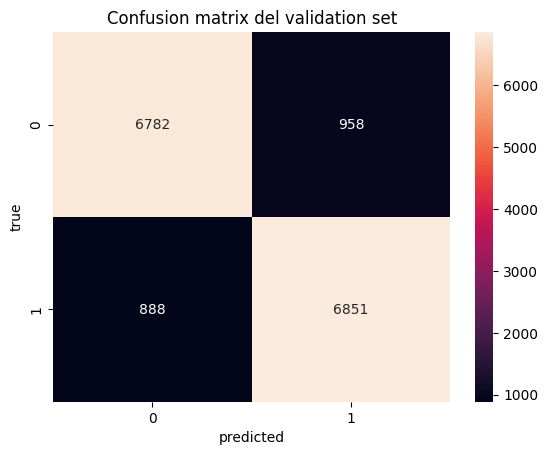

In [15]:
y_pred = grid.predict(X_val)
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix del validation set")
print("precision", precision_score(y_val, y_pred))
print("recall", recall_score(y_val, y_pred))

# Creacion de submit

In [16]:
def create_submission(model): 
    df_test = pd.read_csv("../dataset/hotels_test_procesado.csv")
    assert(len(df_test)==26535)

    prediccion = model.predict(df_test[attrs].values)
    assert(len(prediccion)==26535)

    submit = pd.DataFrame(
        {"is_canceled": prediccion},
        index=df_test["id"],
    )
    assert(len(submit)==26535)

    submit.to_csv("../dataset/submit.csv")

In [17]:
create_submission(grid)

# Guardando el modelo con pickle

Guardamos la svm con pickle:

In [19]:
import pickle

with open('../modelos/xgb.pickle', 'wb') as file:
    pickle.dump(grid, file)